In [0]:
import pandas as pd

In [51]:
url = 'https://raw.githubusercontent.com/sreejpkd/Datasets-Plurasight/master/OnlineRetail.csv'
tx_data=pd.read_csv(url,encoding='iso-8859-1')
tx_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [52]:
tx_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [0]:
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])

In [54]:
tx_data['InvoiceYearMonth'] = tx_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
tx_data['Revenue'] = tx_data['UnitPrice']*tx_data['Quantity']
tx_revenue = tx_data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,495017.730


In [0]:
import pandas as pd
import matplotlib.pyplot as plt


Text(0, 0.5, 'Revenue')

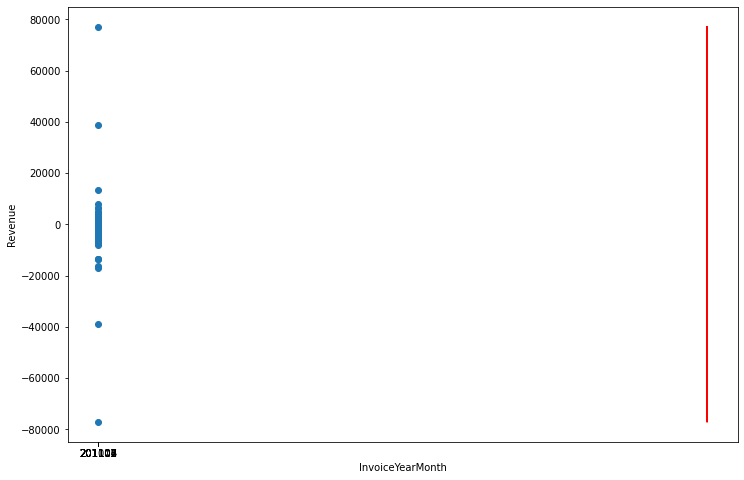

In [56]:
InvoiceYearMonth = tx_data['InvoiceYearMonth']
Revenue = tx_data['Revenue']
tx_data['InvoiceYearMonth'] = tx_data['InvoiceYearMonth'].astype(str)
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(tx_data['InvoiceYearMonth'],tx_data['Revenue'])
plt.plot(InvoiceYearMonth,Revenue,color = 'r')
plt.xlabel('InvoiceYearMonth')
plt.ylabel('Revenue')

In [57]:
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()
tx_revenue.head(10)

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163
5,201105,723333.510,0.466592
6,201106,691123.120,-0.044530
7,201107,495017.730,-0.283749


In [58]:
tx_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [59]:
tx_month_act=tx_data.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
tx_month_act

,InvoiceYearMonth,CustomerID
0,201012,948
1,201101,783
2,201102,798
3,201103,1020
4,201104,899
5,201105,1079
6,201106,1051
7,201107,808


In [60]:
tx_month_act.dtypes

InvoiceYearMonth    object
CustomerID           int64
dtype: object

In [61]:
tx_month_act['InvoiceYearMonth'] = tx_month_act['InvoiceYearMonth'].astype(str)
tx_month_act.dtypes

InvoiceYearMonth    object
CustomerID           int64
dtype: object

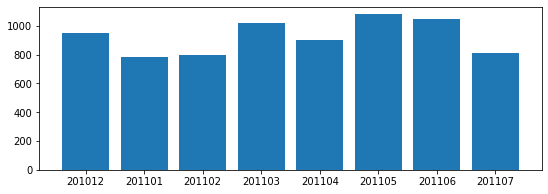

In [62]:
plt.figure(figsize=(9, 3))
plt.bar(tx_month_act['InvoiceYearMonth'],tx_month_act['CustomerID'])
plt.show()

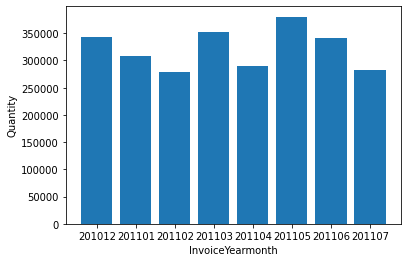

In [63]:
tx_month_sale = tx_data.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
tx_month_sale.dtypes
plt.bar(tx_month_sale['InvoiceYearMonth'],tx_month_sale['Quantity'])
plt.xlabel('InvoiceYearmonth')
plt.ylabel('Quantity')
plt.show()

In [64]:
tx_month_ord_avg = tx_data.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
tx_month_ord_avg

,InvoiceYearMonth,Revenue
0,201012,17.630400
1,201101,15.933088
2,201102,17.976058
3,201103,18.593313
4,201104,16.486399
5,201105,19.533716
6,201106,18.742830
7,201107,16.115432


In [65]:
tx_min_purch = tx_data.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purch.head()
tx_min_purch['CustomerID'] = tx_min_purch['CustomerID'].astype(str)
# tx_min_purch['CustomerID'] = tx_min_purch['CustomerID'].astype(str)
tx_min_purch.dtypes

CustomerID             object
InvoiceDate    datetime64[ns]
dtype: object

In [66]:
tx_data['CustomerID'] = tx_data['CustomerID'].astype(str)
tx_data.dtypes

InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                  object
Country                     object
InvoiceYearMonth            object
Revenue                    float64
dtype: object

In [67]:
tx_data = pd.merge(tx_data,tx_min_purch,on ='CustomerID')
tx_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate_x,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,InvoiceDate_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00


In [68]:
tx_data.rename(columns= {'InvoiceDate_y':'Min.Purchasedt'},inplace=True)
tx_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate_x,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,Min.Purchasedt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00


In [69]:
tx_data['Usertype']='New'

tx_data.loc[tx_data['InvoiceDate_x']>tx_data['Min.Purchasedt'],'Usertype'] = 'Existing'
tx_data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate_x,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,Min.Purchasedt,Usertype
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,New


In [70]:
tx_usertyp_rev = tx_data.groupby(['InvoiceYearMonth','Usertype'])['Revenue'].sum().reset_index()
tx_usertyp_rev

,InvoiceYearMonth,Usertype,Revenue
0,201012,Existing,228215.060
1,201012,New,326388.960
2,201101,Existing,215147.020
3,201101,New,259927.360
4,201102,Existing,303359.430
5,201102,New,133186.720
6,201103,Existing,404289.150
7,201103,New,175675.460
8,201104,Existing,317042.050
9,201104,New,109005.801


In [71]:
# Retention Rate
# Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total

tx_user_purch = tx_data.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_user_purch.head()

tx_retention = pd.crosstab(tx_user_purch['CustomerID'],tx_user_purch['InvoiceYearMonth']).reset_index()
tx_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107
0,12346.0,0,1,0,0,0,0,0,0
1,12347.0,1,1,0,0,1,0,1,0
2,12348.0,1,1,0,0,1,0,0,0
3,12350.0,0,0,1,0,0,0,0,0
4,12352.0,0,0,1,1,0,0,0,0


In [72]:
months = tx_retention.columns[2:]
months[3:6]



Index(['201104', '201105', '201106'], dtype='object', name='InvoiceYearMonth')

In [0]:
retention_array = []
retention_array.clear()
for i in range(len(months)-1):
  retention_data = {}
  selct_month = months[i+1]
  prev_month = months[i]
  retention_data['InvoiceYearMonth'] = int(selct_month)
  retention_data['TotalUserCount'] = tx_retention[selct_month].sum()
  retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selct_month] >0) & (tx_retention[prev_month] >0)][selct_month].sum()
  retention_array.append(retention_data)




In [74]:
  # Convert array to data frame
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate']=tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']
tx_retention.head()

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,798,299,0.374687
1,201103,1020,345,0.338235
2,201104,899,346,0.384872
3,201105,1079,399,0.369787
4,201106,1051,464,0.441484


Text(0, 0.5, 'Revenue')

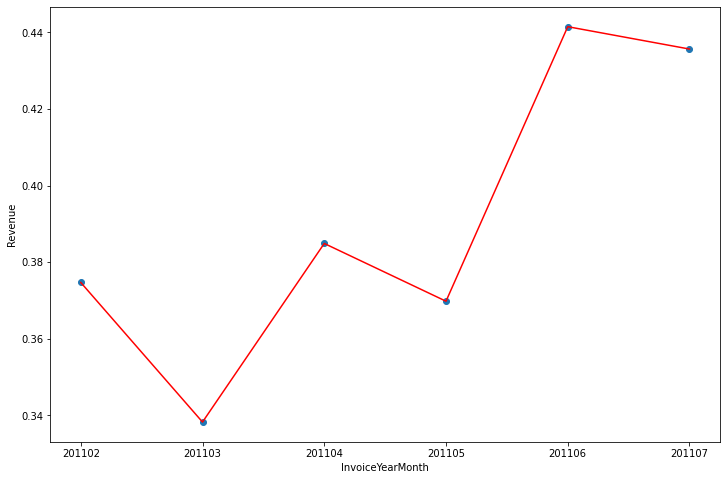

In [76]:
fig,ax = plt.subplots(figsize=(12,8))
tx_retention['InvoiceYearMonth'] = tx_retention['InvoiceYearMonth'].astype(str)
plt.scatter(tx_retention['InvoiceYearMonth'],tx_retention['RetentionRate'])
plt.plot(tx_retention['InvoiceYearMonth'],tx_retention['RetentionRate'],color = 'r')
plt.xlabel('InvoiceYearMonth')
plt.ylabel('Revenue')


In [78]:
# cohert based retention rate
tx_retention =pd.crosstab(tx_data['CustomerID'],tx_data['InvoiceYearMonth'])
new_column_names = ['m_'+str(column) for column in tx_retention.columns]
tx_retention.columns = new_column_names
tx_retention.head()

,m_201012,m_201101,m_201102,m_201103,m_201104,m_201105,m_201106,m_201107
CustomerID,,,,,,,,
12346.0,0,2,0,0,0,0,0,0
12347.0,31,29,0,0,24,0,18,0
12348.0,17,6,0,0,5,0,0,0
12350.0,0,0,17,0,0,0,0,0
12352.0,0,0,15,33,0,0,0,0


In [80]:
query = "{} > 0".format('m_' + '201102')
query

'm_201102 > 0'

In [0]:
#create an array of retained users
